## Mid-term for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### 1. Import the spam dataset and print the first six rows.

In [2]:
df = pd.read_csv("spam_dataset.csv")
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I think 'word_freq_money,' 'char_freq_$,' and 'capital_run_length_average' would be important predictors.

This is because 'money' and '$' in emails may represent something to beg money as spam. And also, the average length of uninterrupted sequences of capital letters seem to be weird because we do not use uninterrupted capital letters in normal mails.

### 3. Visualize the univariate distribution of each of the variables in the previous question.  

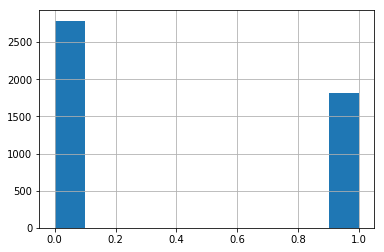

In [4]:
df['spam'].hist()

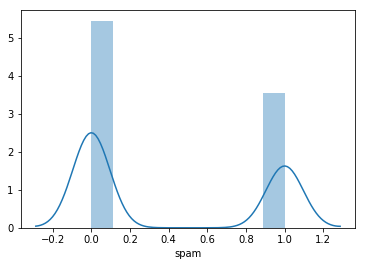

In [5]:
sns.distplot(df['spam'])

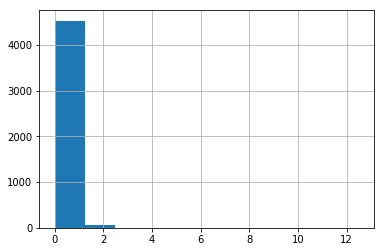

In [6]:
df['word_freq_money:'].hist()

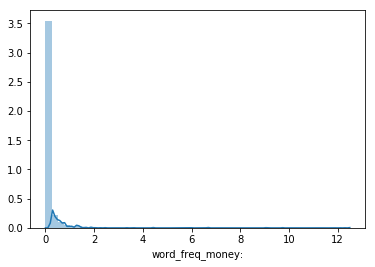

In [7]:
sns.distplot(df['word_freq_money:'])

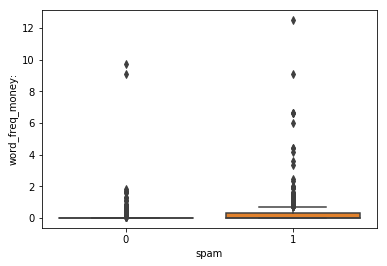

In [8]:
sns.boxplot(x='spam', y='word_freq_money:', data=df)

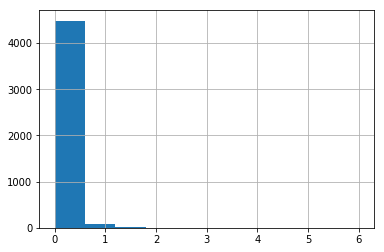

In [9]:
df['char_freq_$:'].hist()

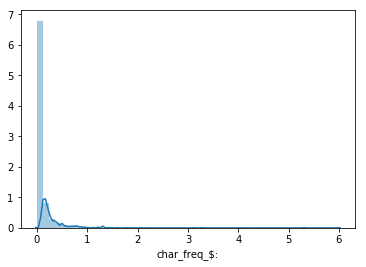

In [10]:
sns.distplot(df['char_freq_$:'])

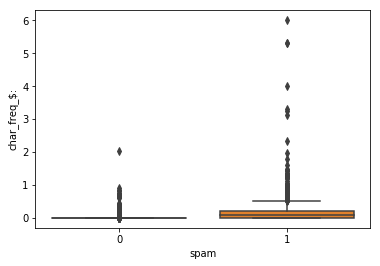

In [11]:
sns.boxplot(x='spam', y='char_freq_$:', data=df)

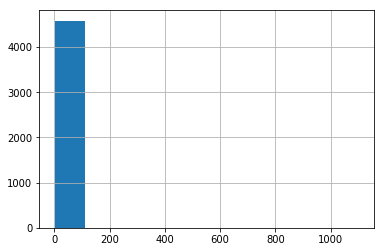

In [12]:
df['capital_run_length_average:'].hist()

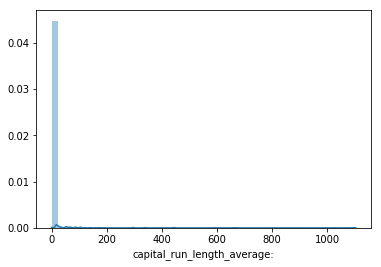

In [13]:
sns.distplot(df['capital_run_length_average:'])

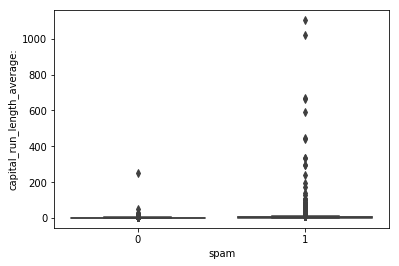

In [14]:
sns.boxplot(x='spam', y='capital_run_length_average:', data=df)

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   (Include models we have learned through class 6 only).

Since the dependent varible is binary data in this case, we can use K-Nearest Neighbors Classifier, Logistic Regression Model (including Ridge and Lasso), Support Vector Machine, (Bagging or Boosting) Decision Tree Classifier, and Random Forest Classifier to predict the binary dependent variable.

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

Both training and test data are important because we need to train the model using parts of the data and also test the accuracy of the model using parts of the data as well. Thus, we split the available data into training and test data. First, we fit training data into our model and construct the way of projection based on the relathionship between the dependent and independent variables in training dataset. Second, we can compare the predicted dependent variables with the dependent variables in test data, and then see the accuracy of the model. Even though the model gets complex and the accuracy in training data improves, it may cause the overfitting apart from generalization. Thus, we want to find a kind of sweet spot indicating the best accuracy in test data, which would refer to a more generalized model.

### 6. What is k-fold cross validation and what do we use it for?

K-fold cross validation is a way of checking the accuracy of a model using limited data. First, we split the data into 'the number of k' groups. Second, we can pick up one of groups as test group and use the rest of groups as training data, and then calculate the accuracy in this case. Third, we repeat the same procedure as before. We can choose the other group as test group and the rest of groups as training data. We repeat this procedure k times and finally calculate the mean of accuracies among k models, which would represent the accucary of the model. We can fully utilize the limited data to test the model.

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified k-fold cross validation tries to keep the same proportion of values on each fold as on the whole dataset. For 
example, in this spam email case, if you use stratified k-fold cross validation, you can get the same rate of spam on each splited fold as the rate of the whole dataset, which would countribut to make the test of the models's accuracy better. This is because, if you use the simple k-fold cross validation, we may accidentaly get the too many spams in one of splited folds, which would affect the accuracy of the projection.

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly B) using k-fold cross-validation.  

In [15]:
# Split the data into training and test subsets
from sklearn.model_selection import train_test_split

y = df['spam']
X = df[{'word_freq_money:','char_freq_$:','capital_run_length_average:'}]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

# Standardize X data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cross validation set up
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5)

**Comment:** First, I set up the training and test data with scaling. And I also set up the k-fold cross-validation (k=5).

In [16]:
# KNN for Classifier with scaling

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("KNN for Classifier (Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(knn.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

KNN for Classifier (Scaled)
Training set score: 0.860
Test set score: 0.818
Mean Cross-Validation, Kfold: 0.816


In [17]:
# KNN for Classifier with scaling and GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 100)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("KNN for Classifier (Scaled, GridSearchCV)")
print("best parameters: {}".format(knn_grid.best_params_))
print("training-set score: {:.3f}".format(knn_grid.score(X_train, y_train)))
print("test-set score: {:.3f}".format(knn_grid.score(X_test, y_test)))
print("mean cross-validation score: {:.3f}".format(knn_grid.best_score_))

testknnscore = knn_grid.score(X_test, y_test)
knnscore = knn_grid.best_score_

KNN for Classifier (Scaled, GridSearchCV)
best parameters: {'kneighborsclassifier__n_neighbors': 23}
training-set score: 0.837
test-set score: 0.823
mean cross-validation score: 0.832


**Comment:** I choosed K-Nearest Neighbors for Classifier to predict spams. And also I choosed 23 as k in this model because GridSearchCV automatically showed this value as the best parameter. For accuracy, test-set score: 0.823 and mean cross-validation score: 0.832.

### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly B) using k-fold cross-validation. Did this model predict test data better than your previous model?

In [18]:
# Logistic Regression with scaling

from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=FutureWarning)

logreg = LogisticRegression(C=1e90).fit(X_train_scaled, y_train)

print("Logistic Regression (Scaled)")
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test))) 

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(
    np.mean(cross_val_score(logreg, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

# Coefficients
logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Coefficients'])
logreg_coef.head()

Logistic Regression (Scaled)
Training set score: 0.816
Test set score: 0.820
Mean Cross Validation, KFold: 0.814


,char_freq_$:,capital_run_length_average:,word_freq_money:
Coefficients,2.883444,6.771438,0.959369


In [19]:
# Pnenalized Logistic Regression with scaling and GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

logreg_param_grid = {'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, cv=kfold, scoring='accuracy').fit(X_train, y_train)

print("Logistic Regression (Scaled, GridSearchCV)")
print("best parameters: {}".format(logreg_grid.best_params_))
print("training-set score: {:.3f}".format(logreg_grid.score(X_train, y_train)))
print("test-set score: {:.3f}".format(logreg_grid.score(X_test, y_test)))
print("mean cross-validation score: {:.3f}".format(logreg_grid.best_score_))

testlogregscore = logreg_grid.score(X_test, y_test)
logregscore = logreg_grid.best_score_

# Coefficients
logreg_coef = pd.DataFrame(data=logreg.coef_, columns=X.columns, index=['Coefficients'])
logreg_coef.head()

Logistic Regression (Scaled, GridSearchCV)
best parameters: {'logisticregression__C': 3.0, 'logisticregression__penalty': 'l1'}
training-set score: 0.816
test-set score: 0.820
mean cross-validation score: 0.814


,char_freq_$:,capital_run_length_average:,word_freq_money:
Coefficients,2.883444,6.771438,0.959369


**Comment:** I choosed Logistic Regression to predict spams. And also I choosed 3 as 'C' and 'l1 = Lasso' as penalty in this model because GridSearchCV automatically showed this value and category as the best parameter. For accuracy, test-set score: 0.820 and mean cross-validation score: 0.814, which seems to be worse than the previous model (KNN).

### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [20]:
# Support Vector Machine (Linear) with scaling
from sklearn.svm import SVC

svm = SVC(kernel='linear').fit(X_train_scaled, y_train)

print("Support Vector Machine (Linear, Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(svm.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(svm, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

Support Vector Machine (Linear, Scaled)
Training set score: 0.813
Test set score: 0.812
Mean Cross-Validation, Kfold: 0.810


In [21]:
# Support Vector Machine (rbf) with scaling
from sklearn.svm import SVC

svm = SVC(kernel='rbf').fit(X_train_scaled, y_train)

print("Support Vector Machine (rbf, Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(svm.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(svm, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

Support Vector Machine (rbf, Scaled)
Training set score: 0.823
Test set score: 0.816
Mean Cross-Validation, Kfold: 0.819


In [22]:
# Support Vector Machine (poly) with scaling
from sklearn.svm import SVC

svm = SVC(kernel='poly').fit(X_train_scaled, y_train)

print("Support Vector Machine (poly, Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(svm.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(svm, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

Support Vector Machine (poly, Scaled)
Training set score: 0.660
Test set score: 0.664
Mean Cross-Validation, Kfold: 0.658


In [23]:
# Support Vector Machine (sigmoid) with scaling
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid').fit(X_train_scaled, y_train)

print("Support Vector Machine (sigmoid, Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(svm.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(svm, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

Support Vector Machine (sigmoid, Scaled)
Training set score: 0.787
Test set score: 0.794
Mean Cross-Validation, Kfold: 0.790


**Comment:** For the selection of kernel, 'rbf' looks better based on the results above.

In [24]:
# Surpport Vector Machine with scaling and GridSearchCV

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_param_grid = {'svc__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 50, 100, 1000], 
                  'svc__gamma': [0.001, 0.01, 0.1, 5, 10, 30, 50, 75, 100]}
svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=kfold, scoring='accuracy').fit(X_train, y_train)

print("Support Vector Machine (Scaled, GridSearchCV)")
print("best parameters: {}".format(svm_grid.best_params_))
print("training-set score: {:.3f}".format(svm_grid.score(X_train, y_train)))
print("test-set score: {:.3f}".format(svm_grid.score(X_test, y_test)))
print("mean cross-validation score: {:.3f}".format(svm_grid.best_score_))

testsvmscore = svm_grid.score(X_test, y_test)
svmscore = svm_grid.best_score_

Support Vector Machine (Scaled, GridSearchCV)
best parameters: {'svc__C': 1, 'svc__gamma': 50}
training-set score: 0.837
test-set score: 0.831
mean cross-validation score: 0.834


**Comment:** I choosed Support Vector Machine to predict spams. And also I choosed 1 as 'C' and 50 as 'gamma' in this model because GridSearchCV automatically showed this value as the best parameter. For accuracy, test-set score: 0.831 and mean cross-validation score: 0.834, which seems to be better than the previous models (KNN and Logistic Regression).

### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [25]:
# Decision Tree Classifier with scaling

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=50).fit(X_train_scaled, y_train)

print("Decision Tree Classifier (Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(tree, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

# Feature Importances
pd.DataFrame(data=tree.feature_importances_, index=X.columns, columns=['Feature Importances'])

Decision Tree Classifier (Scaled)
Training set score: 0.948
Test set score: 0.801
Mean Cross-Validation, Kfold: 0.794


,Feature Importances
char_freq_$:,0.452659
capital_run_length_average:,0.466076
word_freq_money:,0.081265


In [26]:
# Random Forest Classifier with scaling

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=50).fit(X_train_scaled, y_train)

print("Random Forest Classifier (Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(rfc.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rfc.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(rfc, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

# Feature Importances
pd.DataFrame(data=rfc.feature_importances_, index=X.columns, columns=['Feature Importances'])

Random Forest Classifier (Scaled)
Training set score: 0.931
Test set score: 0.810
Mean Cross-Validation, Kfold: 0.808


,Feature Importances
char_freq_$:,0.288412
capital_run_length_average:,0.532858
word_freq_money:,0.178730


In [27]:
# Bagging Decision Trees with scaling

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=50)
bag = BaggingClassifier(tree, n_estimators=10, random_state=50).fit(X_train_scaled, y_train)

print("Bagging Decision Trees (Scaled)")

# Training and Test Scores
print("Training set score: {:.3f}".format(rfc.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(rfc.score(X_test_scaled, y_test)))

# Kfold cross validation
print("Mean Cross-Validation, Kfold: {:.3f}".format(
    np.mean(cross_val_score(rfc, X_train_scaled, y_train, cv=kfold, scoring='accuracy'))))

Bagging Decision Trees (Scaled)
Training set score: 0.931
Test set score: 0.810
Mean Cross-Validation, Kfold: 0.808


**Comment:** Among decision tree, random forest, and bagging decision tree, the randam forest looks better because it uses more trees than the decision tree method (bagging decision tree is almost equivalent to random forest in terms of scores).

In [28]:
# Random Forest Classifier with scaling and GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

rfc_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=50))
rfc_param_grid = {'randomforestclassifier__criterion': ['gini', 'entropy'], 
                  'randomforestclassifier__n_estimators': [10, 100, 300, 500, 800, 1000, 2000]}
rfc_grid = GridSearchCV(rfc_pipe, rfc_param_grid, cv=kfold, scoring='accuracy').fit(X_train, y_train)

print("Random Forest Classifier (Scaled, GridSearchCV)")
print("best parameters: {}".format(rfc_grid.best_params_))
print("training-set score: {:.3f}".format(rfc_grid.score(X_train, y_train)))
print("test-set score: {:.3f}".format(rfc_grid.score(X_test, y_test)))
print("mean cross-validation score: {:.3f}".format(rfc_grid.best_score_))

testrfcscore = rfc_grid.score(X_test, y_test)
rfcscore = rfc_grid.best_score_

Random Forest Classifier (Scaled, GridSearchCV)
best parameters: {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__n_estimators': 1000}
training-set score: 0.948
test-set score: 0.805
mean cross-validation score: 0.807


**Comment:** I choosed Random Forest Classifier to predict spams. And also I choosed 'gini' as 'criterion' and '1000' as 'number of trees' in this model because GridSearchCV automatically showed this category and value as the best parameter. For accuracy, test-set score: 0.805 and mean cross-validation score: 0.807, which seems to be worse than the previous models (KNN, Logistic Regression and SVM).

### 12. Now rerun your best model from question 8 through 11, but this time add three new variables to the model that you think increase prediction accuracy. Did this model predict test data better than your previous models?

In [29]:
print("[Test-set score]")
print("K-Nearest Neighbor score: {:.3f}".format(testknnscore))
print("Logistic Regression score: {:.3f}".format(testlogregscore))
print("Support Vector Machine score: {:.3f}".format(testsvmscore))
print("Random Forest Classifier score: {:.3f}".format(testrfcscore))
print(" ")
print("[Mean cross-validation score]")
print("K-Nearest Neighbor score: {:.3f}".format(knnscore))
print("Logistic Regression score: {:.3f}".format(logregscore))
print("Support Vector Machine score: {:.3f}".format(svmscore))
print("Random Forest Classifier score: {:.3f}".format(rfcscore))

[Test-set score]
K-Nearest Neighbor score: 0.823
Logistic Regression score: 0.820
Support Vector Machine score: 0.831
Random Forest Classifier score: 0.805
 
[Mean cross-validation score]
K-Nearest Neighbor score: 0.832
Logistic Regression score: 0.814
Support Vector Machine score: 0.834
Random Forest Classifier score: 0.807


**Comment:** The Support Vector Machine would be the best model for me because the mean cross-validation score of Support Vector Machine is the largest among all models I estimated (also, the test-set score of SVM is the largest).

In [30]:
# Add new three variables
Z = df[{'word_freq_money:','char_freq_$:','capital_run_length_average:',
        'word_freq_order:','word_freq_receive:','word_freq_business:'}]

# Split the data into training and test subsets
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, random_state=50)

# Standardize Z data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Z_train)
Z_train_scaled = scaler.transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)

**Comment:** I add now three variables into independent variables and then, split and scale the data again.

In [31]:
# Support Vector Machine with scaling and GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
svm_param_grid = {'svc__C': [0.1, 1, 5, 10, 50, 75, 100, 150, 200, 1000], 
                  'svc__gamma': [0.01, 0.1, 5, 10, 20, 30, 50, 75, 100]}
svm_grid = GridSearchCV(svm_pipe, svm_param_grid, cv=kfold, scoring='accuracy').fit(Z_train, y_train)

print("Support Vector Machine (Scaled, GridSearchCV)")
print("best parameters: {}".format(svm_grid.best_params_))
print("training-set score: {:.3f}".format(svm_grid.score(Z_train, y_train)))
print("test-set score: {:.3f}".format(svm_grid.score(Z_test, y_test)))
print("mean cross-validation score: {:.3f}".format(svm_grid.best_score_))

newtestsvmscore = svm_grid.score(Z_test, y_test)
newsvmscore = svm_grid.best_score_

Support Vector Machine (Scaled, GridSearchCV)
best parameters: {'svc__C': 75, 'svc__gamma': 10}
training-set score: 0.894
test-set score: 0.849
mean cross-validation score: 0.843


In [32]:
print("[Test-set score]")
print("Support Vector Machine score: {:.3f}".format(testsvmscore))
print("NEW Support Vector Machine score: {:.3f}".format(newtestsvmscore))
print(" ")
print("[Mean cross-validation score]")
print("Support Vector Machine score: {:.3f}".format(svmscore))
print("NEW Support Vector Machine score: {:.3f}".format(newsvmscore))

[Test-set score]
Support Vector Machine score: 0.831
NEW Support Vector Machine score: 0.849
 
[Mean cross-validation score]
Support Vector Machine score: 0.834
NEW Support Vector Machine score: 0.843


**Comment:** By adding new three variables, the scores (test and cross-validation) of SVM improved.

### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

In [33]:
# KNN for Classifier with scaling and GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 100)}
knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv=kfold, scoring='accuracy')
knn_grid.fit(Z_train, y_train)

print("KNN for Classifier (Scaled, GridSearchCV)")
print("best parameters: {}".format(knn_grid.best_params_))
print("training-set score: {:.3f}".format(knn_grid.score(Z_train, y_train)))
print("test-set score: {:.3f}".format(knn_grid.score(Z_test, y_test)))
print("mean cross-validation score: {:.3f}".format(knn_grid.best_score_))

newtestknnscore = knn_grid.score(Z_test, y_test)
newknnscore = knn_grid.best_score_

KNN for Classifier (Scaled, GridSearchCV)
best parameters: {'kneighborsclassifier__n_neighbors': 9}
training-set score: 0.859
test-set score: 0.836
mean cross-validation score: 0.836


In [34]:
# Pnenalized Logistic Regression with scaling and GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

logreg_param_grid = {'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__C': np.linspace(1, 100, 100)}
logreg_grid = GridSearchCV(logreg_pipe, logreg_param_grid, cv=kfold, scoring='accuracy').fit(Z_train, y_train)

print("Logistic Regression (Scaled, GridSearchCV)")
print("best parameters: {}".format(logreg_grid.best_params_))
print("training-set score: {:.3f}".format(logreg_grid.score(Z_train, y_train)))
print("test-set score: {:.3f}".format(logreg_grid.score(Z_test, y_test)))
print("mean cross-validation score: {:.3f}".format(logreg_grid.best_score_))

newtestlogregscore = logreg_grid.score(Z_test, y_test)
newlogregscore = logreg_grid.best_score_

Logistic Regression (Scaled, GridSearchCV)
best parameters: {'logisticregression__C': 12.0, 'logisticregression__penalty': 'l1'}
training-set score: 0.817
test-set score: 0.829
mean cross-validation score: 0.816


In [35]:
# Random Forest Classifier with scaling and GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

rfc_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=50))
rfc_param_grid = {'randomforestclassifier__criterion': ['gini', 'entropy'], 
                  'randomforestclassifier__n_estimators': [10, 100, 300, 500, 800, 1000, 2500, 5000, 7500, 10000]}
rfc_grid = GridSearchCV(rfc_pipe, rfc_param_grid, cv=kfold, scoring='accuracy').fit(Z_train, y_train)

print("Random Forest Classifier (Scaled, GridSearchCV)")
print("best parameters: {}".format(rfc_grid.best_params_))
print("training-set score: {:.3f}".format(rfc_grid.score(Z_train, y_train)))
print("test-set score: {:.3f}".format(rfc_grid.score(Z_test, y_test)))
print("mean cross-validation score: {:.3f}".format(rfc_grid.best_score_))

newtestrfcscore = rfc_grid.score(Z_test, y_test)
newrfcscore = rfc_grid.best_score_

Random Forest Classifier (Scaled, GridSearchCV)
best parameters: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__n_estimators': 1000}
training-set score: 0.963
test-set score: 0.844
mean cross-validation score: 0.828


In [36]:
print("[Test-set score]")
print("K-Nearest Neighbor score: {:.3f}".format(testknnscore))
print("NEW K-Nearest Neighbor score: {:.3f}".format(newtestknnscore))
print("Logistic Regression score: {:.3f}".format(testlogregscore))
print("NEW Logistic Regression score: {:.3f}".format(newtestlogregscore))
print("Support Vector Machine score: {:.3f}".format(testsvmscore))
print("NEW Support Vector Machine score: {:.3f}".format(newtestsvmscore))
print("Random Forest Classifier score: {:.3f}".format(testrfcscore))
print("NEW Random Forest Classifier score: {:.3f}".format(newtestrfcscore))
print(" ")
print("[Mean cross-validation score]")
print("K-Nearest Neighbor score: {:.3f}".format(knnscore))
print("NEW K-Nearest Neighbor score: {:.3f}".format(newknnscore))
print("Logistic Regression score: {:.3f}".format(logregscore))
print("NEW Logistic Regression score: {:.3f}".format(newlogregscore))
print("Support Vector Machine score: {:.3f}".format(svmscore))
print("NEW Support Vector Machine score: {:.3f}".format(newsvmscore))
print("Random Forest Classifier score: {:.3f}".format(rfcscore))
print("NEW Random Forest Classifier score: {:.3f}".format(newrfcscore))

[Test-set score]
K-Nearest Neighbor score: 0.823
NEW K-Nearest Neighbor score: 0.836
Logistic Regression score: 0.820
NEW Logistic Regression score: 0.829
Support Vector Machine score: 0.831
NEW Support Vector Machine score: 0.849
Random Forest Classifier score: 0.805
NEW Random Forest Classifier score: 0.844
 
[Mean cross-validation score]
K-Nearest Neighbor score: 0.832
NEW K-Nearest Neighbor score: 0.836
Logistic Regression score: 0.814
NEW Logistic Regression score: 0.816
Support Vector Machine score: 0.834
NEW Support Vector Machine score: 0.843
Random Forest Classifier score: 0.807
NEW Random Forest Classifier score: 0.828


**Comment:** By adding new three variables, the scores (test and cross-validation) of all four models improved. I would like to choose the Support Vector Machine as the best model because this model has the best score among all models.

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I think that the information about the email address could increase the model's predictive power. The spam emails often contain the weird domain characters in their email addresses such as @92347.com or @098.nl. If I include some samples of such weird email addresses as independent variables, the prediction could impove. Or the length of characters of email address might be a good independent variable because the long email address might represent the spam.

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.   (Include models we have learned through class 6 only).

For a continuous dependent variable, we can use K-Nearest Neighbors Regression, (Ridge or Lasso) Linear Regression, (Bagging or Boosting) Decision Tree Regression, and Random Forest Regression to predict the dependent variables. (Support Vector Machine and Logistic Regression could be used for continuous dependent variables. But we may not learn it in class.)